# Classification Predict

## Table of Contents


1. [Introduction](#1.-Introduction)
    - Problem statement
    - Objective
    
2. [Importing Packages](#2.-Importing-Packages)

3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
    - Load Data 
    
4. [Pre-processing](#4.-Pre-processing)
    - [Removing the Noise](#Removing-the-Noise)
       - [Lowercasing Data](#Lowercasing-Data) 
       - [Removing Contractions](#Removing-Contractions)
       - [Removing Web Urls](#Removing-Web-Urls)
       - [Removing Punctuations](#Removing-Punctuations)
       - [Removing Numbers](#Removing-Numbers)
       - [Removing Extra Space](#Removing-Extra-Space) 
       - [Tokenization](#Tokenization)
       - [Removing Stop Words](#Removing-Stop-Words)
       - [Removing Emojis](#Removing-Emojis)
       - [Removing Punctuation once more](#Removing-Punctuation-once-more)
       - [Tokenization_2](#Tokenization_2)
       - [Stemmer](#Stemmer)
       - [Lemmatization](#Lemmatization)
      
       
    
5. [Feature Engineering](#5.-Feature-Engineering)
    - Bag of Words
    - N-grams
        
6. [Modelling](#6.-Modelling)
7. [Conclusion](#7.-Conclusion)

## 1. Introduction
[Back to Table of Contents](#Table-of-Contents)

###  Problem Statement

Many companies would like to determine how their customers perceive climate change and whether or not they believe it is a real threat. 
Knowledge of this would add to their market research efforts in gauging how their product/service may be received.

An accurate and robust solution to this problem would give the companies access to a broad understanding of consumer sentiment, spanning multiple demographic and geographics, as a result increasing companies' insights and informing future
marketing strategies for the betterment of consumer experience and company performance.



### Objective

Building a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. The tweets belonging to any of the following class descriptions:

2 News: the tweet links to factual news about climate change

1 Pro: the tweet supports the belief of man-made climate change

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1 Anti: the tweet does not believe in man-made climate change Variable definitions

## 2. Importing Packages
[Back to Table of Contents](#Table-of-Contents)

In [79]:
import nltk
import string
import re
import string
import contractions
import sys  
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from cleantext import clean

from nltk import TreebankWordTokenizer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
# from pandas.core.common import SettingWithCopyWarning
from comet_ml import Experiment

In [80]:
# Only run this cell if you need to install it
pip install comet_ml
pip install cleantext

SyntaxError: invalid syntax (2730272089.py, line 2)

### Starting comet experiment

In [81]:
experiment = Experiment(api_key="DgOUdi281ImcebtckQoquGSnl",project_name="general",workspace="bronwyn",)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/bronwyn/general/4018defb7f2247c8939bdbc28f2e1650



## 3. Exploratory Data Analysis
[Back to Table of Contents](#Table-of-Contents)

### Load data

In [41]:
# Display data
data = pd.read_csv("train.csv")
data.head(3)

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562

In [42]:
#see the min, max and mode(from dictionary) category of the sentiments
data_sorted = data[["message", "sentiment"]]

dict_ = {}

for i in data_sorted["sentiment"]:
    if i in dict_:
        dict_[i] += 1
    else:
        dict_[i] = 1

print("total number of sentiments:", len(data_sorted))
print("counts of the respective sentiments:", dict_)

total number of sentiments: 15819
counts of the respective sentiments: {1: 8530, 2: 3640, 0: 2353, -1: 1296}


In [43]:
#the skewness and kurtosis(lack of ourtliers) of the sentiments
print("skewness: ", data_sorted["sentiment"].skew())
print("kurtosis: ",data_sorted["sentiment"].kurtosis())

skewness:  -0.6839586535115556
kurtosis:  0.12297618882173778


Text(0.5, 1.0, 'Distribution of Sentiments')

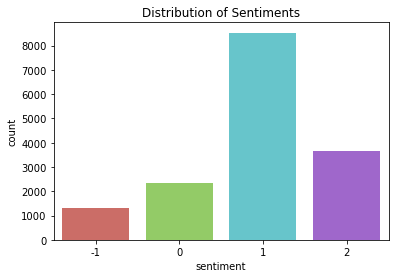

In [44]:
#the frequency distribution of the sentiments
#Thibello
sns.countplot(x = 'sentiment', data = data_sorted, palette="hls")
plt.title("Distribution of Sentiments")

In [45]:
#counting the number of respective impurities

punctuations = 0
numbers = 0

for i in data_sorted["message"]:
    for k in i.split():
        if k in string.punctuation:
            punctuations+=1
        if k.isdigit():
            numbers += 1
print("punctuations present in the tweets:", punctuations)
print("numbers present in the tweets:", numbers)


punctuations present in the tweets: 1440
numbers present in the tweets: 1111


## 4. Pre-processing
[Back to Table of Contents](#Table-of-Contents)

### Revise data 

In [46]:
#making the tweetid the index
data = pd.read_csv("train.csv", index_col = "tweetid")
data.head(3)


sentiment                                            message
tweetid                                                              
625221           1  PolySciMajor EPA chief doesn't think carbon di...
126103           1  It's not like we lack evidence of anthropogeni...
698562           2  RT @RawStory: Researchers say we have three ye...

In [47]:
#rearrange the columns for clarity
data_sorted = data[["message", "sentiment"]]
data_sorted.head(3)

message  sentiment
tweetid                                                              
625221   PolySciMajor EPA chief doesn't think carbon di...          1
126103   It's not like we lack evidence of anthropogeni...          1
698562   RT @RawStory: Researchers say we have three ye...          2

## Removing the Noise

### Lowercasing Data

In [48]:
#make everything lower case
'''
Converting every letter into lowercase helps to understand better what the words 
state.
'''
data_sorted['message'] = data_sorted['message'].str.lower()
data_sorted.head(20)

message  sentiment
tweetid                                                              
625221   polyscimajor epa chief doesn't think carbon di...          1
126103   it's not like we lack evidence of anthropogeni...          1
698562   rt @rawstory: researchers say we have three ye...          2
573736   #todayinmaker# wired : 2016 was a pivotal year...          1
466954   rt @soynoviodetodas: it's 2016, and a racist, ...          1
425577   worth a read whether you do or don't believe i...          1
294933   rt @thenation: mike pence doesn’t believe in g...          1
992717   rt @makeandmendlife: six big things we can all...          1
664510   @aceofspadeshq my 8yo nephew is inconsolable. ...          1
260471   rt @paigetweedy: no offense… but like… how do ...          1
295793   rt @stephenschlegel: she's thinking about how ...          1
763719   i do hope people who are vocal about climate c...          1
454673   rt @tveitdal: we only have a 5 percent chance ...          2
41161    rt @alifaith55: oh. my. god.\n\ntrump's govern...          1
658092   fossil fuel giant exxonmobil ‘misled’ the publ...          2
319524   rt @glblctzn: 'i don't wanna live forever – an...          1
698009   rt @jackholmes0: issues scrubbed from https://...          1
490604   rt @patagonia: if our elected leaders fail to ...          1
228658   rt @sensanders: we have a president-elect who ...          1
547924   calum: *tweets abt reunitingish w the cast*\n-...          0

In [49]:
data_sorted.tail(20)

message  sentiment
tweetid                                                              
52528    rt @sethmacfarlane: hrc proposes installing ha...          1
580806   rt @sapinker: the only practical way to avert ...          1
331127   rt @sensanders: on virtually every major issue...          1
585908   michael bloomberg to world leaders: ignore tru...          2
296403   suicides of nearly 60,000 indian farmers linke...          2
386076   rt @cathdweeb: me with full knowledge of globa...          1
830383   rt @grindtv: new head of epa says climate chan...          2
213863   rt @herbermp: @sness5561_ness al gore is a idi...         -1
447067   #scottpruit climate change comments would be l...          1
127777   rt @thepowersthatbe: now if she could only be ...          0
705048   the quest to capture and store carbon — and sl...          2
572819   this global warming so late in the season is p...          0
426353   rt @stephenschlegel: she's thinking about how ...          1
989478   rt @sierraclub: 2016: hottest year in history....          1
442853   rt @thinkprogress: epa head falsely claims car...          1
22001    rt @ezlusztig: they took down the material on ...          1
17856    rt @washingtonpost: how climate change could b...          2
384248   notiven: rt: nytimesworld :what does trump act...          0
819732   rt @sara8smiles: hey liberals the climate chan...         -1
806319   rt @chet_cannon: .@kurteichenwald's 'climate c...          0

### Removing Contractions

In [50]:
#expand all existing contractions

def expand_contractions(tweet):
    return " ".join([contractions.fix(c) for c in tweet.split()])

data_sorted["message"] = data_sorted["message"].apply(expand_contractions)
data_sorted.head()

message  sentiment
tweetid                                                              
625221   polyscimajor epa chief does not think carbon d...          1
126103   it is not like we lack evidence of anthropogen...          1
698562   rt @rawstory: researchers say we have three ye...          2
573736   #todayinmaker# wired : 2016 was a pivotal year...          1
466954   rt @soynoviodetodas: it is 2016, and a racist,...          1

### Removing Web Urls

In [51]:
#remove web urls 
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
data_sorted['message'] = data_sorted['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
data_sorted.iloc[0]['message']

'polyscimajor epa chief does not think carbon dioxide is main because of global warming and.. wait, what!? url-web via @mashable'

### Removing Punctuations

Removing punctuation marks assists us to treat every word equally, 
E.g sweet! and sweet are the same without punctuation. 

In [52]:
#remove all punctuations

def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

data_sorted['message'] = data_sorted['message'].apply(remove_punctuation)
data_sorted.head()

message  sentiment
tweetid                                                              
625221   polyscimajor epa chief does not think carbon d...          1
126103   it is not like we lack evidence of anthropogen...          1
698562   rt rawstory researchers say we have three year...          2
573736   todayinmaker wired  2016 was a pivotal year in...          1
466954   rt soynoviodetodas it is 2016 and a racist sex...          1

In [53]:
data_sorted.iloc[0]['message']

'polyscimajor epa chief does not think carbon dioxide is main because of global warming and wait what urlweb via mashable'

### Removing Numbers

"For example, when we are doing sentiment analysis then the number doesn’t hold any specific meaning to the data but if the task is to perform NER (Name Entity Recognition) or POS (Part of Speech tagging) then use the removing of number technique carefully."

In [54]:
def remove_digits(post):
    return ''.join([i for i in post if not i.isdigit()])

data_sorted['message'] = data_sorted['message'].apply(remove_digits)
data_sorted.head()

message  sentiment
tweetid                                                              
625221   polyscimajor epa chief does not think carbon d...          1
126103   it is not like we lack evidence of anthropogen...          1
698562   rt rawstory researchers say we have three year...          2
573736   todayinmaker wired   was a pivotal year in the...          1
466954   rt soynoviodetodas it is  and a racist sexist ...          1

In [55]:
data_sorted.iloc[3]['message']

'todayinmaker wired   was a pivotal year in the war on climate change urlweb'

In [56]:
len(data_sorted.iloc[3]['message'])

75

### Removing Extra Space

Removing expace could help reduce the memory usage 

In [57]:
def remove_extra_space(text):
    return " ".join(text.split())

data_sorted['message'] = data_sorted['message'].apply(remove_extra_space)
data_sorted.head()

message  sentiment
tweetid                                                              
625221   polyscimajor epa chief does not think carbon d...          1
126103   it is not like we lack evidence of anthropogen...          1
698562   rt rawstory researchers say we have three year...          2
573736   todayinmaker wired was a pivotal year in the w...          1
466954   rt soynoviodetodas it is and a racist sexist c...          1

In [58]:
data_sorted.iloc[3]['message']

'todayinmaker wired was a pivotal year in the war on climate change urlweb'

In [59]:
len(data_sorted.iloc[3]['message']) 

73

The decrease in the number of characters shows that extra space have been removed.

### Tokenization

In [60]:
#tokenisation to treat each word with respect
tokeniser = TreebankWordTokenizer()
data_sorted['message'] = data_sorted['message'].apply(tokeniser.tokenize)

data_sorted

message  sentiment
tweetid                                                              
625221   [polyscimajor, epa, chief, does, not, think, c...          1
126103   [it, is, not, like, we, lack, evidence, of, an...          1
698562   [rt, rawstory, researchers, say, we, have, thr...          2
573736   [todayinmaker, wired, was, a, pivotal, year, i...          1
466954   [rt, soynoviodetodas, it, is, and, a, racist, ...          1
...                                                    ...        ...
22001    [rt, ezlusztig, they, took, down, the, materia...          1
17856    [rt, washingtonpost, how, climate, change, cou...          2
384248   [notiven, rt, nytimesworld, what, does, trump,...          0
819732   [rt, sarasmiles, hey, liberals, the, climate, ...         -1
806319   [rt, chetcannon, kurteichenwalds, climate, cha...          0

[15819 rows x 2 columns]

In [61]:
data_sorted.iloc[0]['message']

['polyscimajor',
 'epa',
 'chief',
 'does',
 'not',
 'think',
 'carbon',
 'dioxide',
 'is',
 'main',
 'because',
 'of',
 'global',
 'warming',
 'and',
 'wait',
 'what',
 'urlweb',
 'via',
 'mashable']

### Removing Stop Words

In [62]:
#remove standard stop words, which are words of insignificance
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

data_sorted['message'] = data_sorted['message'].apply(remove_stop_words)
data_sorted

message  sentiment
tweetid                                                              
625221   [polyscimajor, epa, chief, think, carbon, diox...          1
126103   [like, lack, evidence, anthropogenic, global, ...          1
698562   [rt, rawstory, researchers, say, three, years,...          2
573736   [todayinmaker, wired, pivotal, year, war, clim...          1
466954   [rt, soynoviodetodas, racist, sexist, climate,...          1
...                                                    ...        ...
22001    [rt, ezlusztig, took, material, global, warmin...          1
17856    [rt, washingtonpost, climate, change, could, b...          2
384248   [notiven, rt, nytimesworld, trump, actually, b...          0
819732   [rt, sarasmiles, hey, liberals, climate, chang...         -1
806319   [rt, chetcannon, kurteichenwalds, climate, cha...          0

[15819 rows x 2 columns]

In [63]:
for i in data_sorted["message"]:
    print(i)

['polyscimajor', 'epa', 'chief', 'think', 'carbon', 'dioxide', 'main', 'global', 'warming', 'wait', 'urlweb', 'via', 'mashable']
['like', 'lack', 'evidence', 'anthropogenic', 'global', 'warming']
['rt', 'rawstory', 'researchers', 'say', 'three', 'years', 'act', 'climate', 'change', 'late', 'urlweb', 'urlweb…']
['todayinmaker', 'wired', 'pivotal', 'year', 'war', 'climate', 'change', 'urlweb']
['rt', 'soynoviodetodas', 'racist', 'sexist', 'climate', 'change', 'denying', 'bigot', 'leading', 'polls', 'electionnight']
['worth', 'read', 'whether', 'believe', 'climate', 'change', 'urlweb', 'urlweb']
['rt', 'thenation', 'mike', 'pence', 'believe', 'global', 'warming', 'smoking', 'causes', 'lung', 'cancer', 'urlweb']
['rt', 'makeandmendlife', 'six', 'big', 'things', 'today', 'fight', 'climate', 'change', 'climate', 'activistã¢â‚¬â¦', 'urlweb', 'hã¢â‚¬â¦']
['aceofspadeshq', 'yo', 'nephew', 'inconsolable', 'wants', 'die', 'old', 'age', 'like', 'perish', 'fiery', 'hellscape', 'climate', 'change']


['epascottpruitt', 'think', 'co', 'drives', 'climate', 'change', 'let', 'us', 'send', 'copy', 'global', 'warming', 'dummies', 'urlweb']
['rt', 'leeiniowa', 'trump', 'already', 'started', 'reprisals', 'epa', 'scientists', 'attended', 'climate', 'change', 'conferences', 'want…']
['latest', 'marxist', 'theory', 'relevant', 'climate', 'change', 'today', 'urlweb']
['rt', 'craigrbrittain', 'acknowledging', 'reports', 'said', 'climate', 'change', 'years', 'away', 'one', 'denying', 'clima…']
['rt', 'sethmacfarlane', 'hrc', 'proposes', 'installing', 'half', 'billion', 'solar', 'panels', 'end', 'first', 'term', 'trump', 'thinks', 'climate', 'change', 'hoaxã¢â‚¬â¦']
['jimgilman', 'joelquatro', 'mistercarter', 'uptownlinda', 'washingtonpost', 'finally', 'admit', 'yes', 'global', 'warming', 'f…', 'urlweb']
['laheatwave', 'global', 'warming']
['finallevel', 'sacca', 'favorite', 'still', 'china', 'made', 'climate', 'change', 'tweet']
['iã¢â‚¬â„¢m', 'sure', 'zach', 'understands', 'climate', 'change', 

['rt', 'stephenschlegel', 'thinking', 'going', 'die', 'husband', 'believe', 'climate', 'change', 'urlwebã¢â‚¬â¦']
['rt', 'justinhendrix', 'donald', 'believes', 'russian', 'interference', 'us', 'election', 'hoax', 'also', 'believes', 'climate', 'change', 'hoax', 'e…']
['rt', 'cfigueres', 'comes', 'climate', 'change', 'timing', 'everything', 'thanks', 'contributed', 'comment', 'nature', 'urlweb…']
['publication', 'bias', 'found', 'climate', 'change', 'research', 'urlweb']
['ship', 'made', 'voyage', 'would', 'happened', 'without', 'global', 'warming', 'urlweb']
['president', 'buhari', 'leaves', 'climate', 'change', 'conference', 'monday', 'urlweb']
['eu', 'package', 'help', 'developing', 'nations', 'combat', 'climate', 'change', 'climateaction', 'urlweb', 'eusupport', 'acp', 'climateaction']
['rt', 'hellbentpod', 'could', 'convincingly', 'argue', 'climate', 'change', 'real', 'urlweb']
['wow', 'heavy', 'financial', 'hitters', 'demanding', 'climate', 'change', 'risk', 'evaluation', 'busines

['rt', 'deleteuracct', 'new', 'deleteuracct', 'ep', 'feeling', 'heat', 'ericholthaus', 'climate', 'change', 'must', 'survive', 'it…']
['free', 'access', 'nowamp', 'ideal', 'time', 'read', 'jastw', 'forum', 'climate', 'change', 'book', 'ghoshamitav', 'wcommentary', 'urlweb']
['cnn', 'trump', 'adm', 'climate', 'change']
['rt', 'pummeled', 'drought', 'climate', 'change', 'beloved', 'lake', 'tahoe', 'hot', 'water', 'urlweb', 'via', 'sfgate']
['rt', 'billclintonthof', 'australia', 'pm', 'adviser', 'says', 'climate', 'change', 'unled', 'ruse', 'establish', 'new', 'world', 'order', 'urlweb', 'https…']
['americans', 'worried', 'climate', 'change', 'today', 'ever', 'gallup', 'urlweb']
['rt', 'jtlarsen', 'words', 'cable', 'news', 'solve', 'climate', 'change', 'health', 'care', 'story', 'selection', 'video', 'cable', 'news', 'execs…']
['sensanders', 'proof', 'climate', 'change']
['rt', 'safetypindaily', 'experts', 'trump', 'climate', 'change', 'threatens', 'us', 'military', 'via', 'voxdotcom', 'u

['sitting', 'class', 'sweating', 'global', 'warming', 'least', 'making', 'room', 'smell', 'like', 'pool', 'sweat', 'chlorine', '🏊🙃']
['rt', 'wsj', 'appetite', 'oil', 'gas', 'continue', 'grow', 'despite', 'efforts', 'curb', 'climate', 'change', 'says', 'saudi', 'energy', 'minister', 'urlwebã¢â‚¬â¦']
['rt', 'mngxitama', 'floods', 'direct', 'result', 'climate', 'change', 'caused', 'imperialist', 'countries', 'pay', 'environmental', 'reparatioã¢â‚¬â¦']
['hope', 'everyone', 'paying', 'attention', 'trump', 'started', 'global', 'warming', 'first', 'yemen', 'syria', 'today', 'urlweb']
['companies', 'blocking', 'climate', 'change', 'progress', 'urlweb', 'urlweb']
['rt', 'socaltrump', 'last', 'year', 'government', 'spent', 'tax', 'dollars', 'climate', 'change', 'musical', 'waste', 'the…']
['rt', 'gubes', 'see', 'global', 'warming', 'real', 'bitches', 'thirsty', 'resident', 'everybody', 'jeverettrende']
['might', 'polar', 'bear', 'glad', 'global', 'warming', 'urlweb']
['rt', 'spiritcircle', 'real

['nhs', 'crisis', 'climate', 'change', 'making', 'many', 'pointless', 'reorganisations', 'many', 'pointless', 'targets', 'amp', 'inspections']
['rt', 'abcnewsmelb', 'port', 'phillip', 'bay', 'pretty', 'good', 'nick', 'despite', 'growing', 'population', 'climate', 'change', 'environmental', 'health', 'report', 'find…']
['eddie', 'joyce', 'adds', 'climate', 'change', 'ministerial', 'portfolio', 'vocmnews']
['senatormroberts', 'funny', 'global', 'warming', 'nutters', 'refuse', 'ever', 'debate', 'anyone', 'skeptical', 'almost', 'li…', 'urlweb']
['rt', 'stephenschlegel', 'thinking', 'going', 'die', 'husband', 'believe', 'climate', 'change', 'urlwebã¢â‚¬â¦']
['trump', 'revokes', 'obama', 'climate', 'change', 'rules', 'declares', 'end', 'war', 'coal', 'urlweb']
['kennysgk', 'global', 'warmingなら地球温暖化']
['rt', 'stevesgoddard', 'nasa', 'tripled', 'global', 'warming', 'since', 'year', 'time', 'satellites', 'show', 'temperature', 'increaseã¢â‚¬â¦']
['rt', 'thecandiddiva', 'jattuengineer', 'shows',

['paulkrugman', 'science', 'global', 'warming', 'settled']
['joined', 'natgeochannel', 'cf', 'combating', 'climate', 'change', 'take', 'action', 'beforetheflood', 'urlweb']
['form', 'informed', 'opinion', 'climate', 'change', 'look', 'good', 'sources', 'urlweb']
['paris', 'climate', 'change', 'deal', 'becomes', 'international', 'law', 'urlweb']
['denying', 'climate', 'change', 'fighting', 'supreme', 'court', 'editorial', 'boards', 'across', 'successes', 'health', 'insurance']
['rt', 'washingtonpost', 'top', 'download', 'federal', 'site', 'right', 'park', 'service', 'report', 'climate', 'change', 'urlweb']
['rt', 'scottzolak', 'global', 'warming', 'sucks']
['rt', 'mikalawalker', 'still', 'think', 'global', 'warming', 'exists', 'urlweb']
['rt', 'andrewbuncombe', 'india', 'china', 'taking', 'climate', 'change', 'leadership', 'trump', 'ceded', 'urlweb']
['rt', 'appolitics', 'former', 'vp', 'gore', 'leading', 'voice', 'climate', 'change', 'says', 'talk', 'trump', 'productive', 'urlweb']
['r

['rt', 'clnemah', 'skin', 'clear', 'grades', 'improved', 'hair', 'shinier', 'student', 'loans', 'paid', 'global', 'warming', 'gone', 'urlweb…']
['used', 'concerned', 'global', 'warming', 'cheetos', 'presidency', 'want', 'gw', 'speed', 'end', 'us']
['rt', 'fbraswell', 'driving', 'climate', 'change', 'alarmism', 'listen', 'find', 'climate', 'change', 'scientists', 'say', 'urlwebã¢â‚¬â¦']
['nowthisnews', 'anyone', 'explain', 'major', 'climate', 'change', 'events', 'happened', 'earths', 'history', 'could', 'blamed']
['rex', 'tillerson', 'used', 'email', 'alias', 'exxon', 'talk', 'climate', 'change', 'urlweb', 'bbcworld', 'urlweb']
['rt', 'daratorres', '“got', 'sneak', 'peek', 'al', 'gores', 'aninconvenientsequel', 'climate', 'change', 'doc', 'important', 'film', 'worth', 'time', 'check', 'to…']
['rt', 'potus', 'science', 'could', 'clearer', 'owe', 'kids', 'everything', 'combat', 'climate', 'change', 'urlweb']
['rt', 'climatecentral', 'soon', 'trump', 'takes', 'office', 'going', 'sued', 'cl

['rt', 'brianbeutler', 'little', 'known', 'fact', 'unsecured', 'private', 'emails', 'massive', 'global', 'warming', 'potential', 'fine', 'urlweb…']
['rt', 'cnn', 'centers', 'disease', 'control', 'postponed', 'climate', 'change', 'summit', 'ahead', 'president', 'donald', 'trumps', 'inauguration', 'urlweb…']
['rt', 'cnn', 'snow', 'bleached', 'anemones', 'cracks', 'ice', 'climate', 'change', 'looks', 'likeã¢â‚¬â¦']
['rt', 'jackmcpatton', 'blame', 'climate', 'change', 'shame', 'breaking', 'news', 'emergency', 'services', 'rush', 'manchester', 'arena', 'urlweb…']
['rt', 'ecointernet', 'epa', 'chief', 'carbon', 'dioxide', 'primary', 'global', 'warming', 'chicago', 'sun', 'times', 'urlweb', 'climate', 'enviro…']
['may', 'happen', 'arctic', 'peatlands', 'times', 'climate', 'change', 'melting', 'ice', 'shields', 'rising', 'temperat…', 'urlweb']
['rt', 'robellcampbin', 'rtpt', 'blog', 'comments', 'climate', 'change', 'treasonous', 'us', 'congress', 'amp', 'accusations', 'paedophilia', 'easy', 's

['rt', 'tomfitton', 'obama', 'admin', 'officials', 'may', 'mishandled', 'scientific', 'data', 'advance', 'global', 'warming', 'alarmism', 'urlweb']
['sierraclub', 'seeks', 'probe', 'epapruitt', 'climate', 'change', 'science', 'blind', 'eye', 'urlweb', 'lcvoters', 'sciencemarchdc', 'nrdc', 'elizkolbert']
['‘doomsday’', 'seed', 'vault', 'flooded', 'climate', 'change', 'ice', 'melt', 'urlweb']
['rt', 'jamisonfoser', 'thereã¢â‚¬â„¢s', 'simple', 'explanation', 'donald', 'trump', 'knows', 'climate', 'change', 'real', 'give', 'shit', 'httpã¢â‚¬â¦']
['rt', 'spiritualsmoker', 'absolutely', 'disgusting', 'big', 'problem', 'climate', 'change', 'yet', 'nobody', 'seems', 'give', 'fuck']
['anyone', 'think', 'global', 'warming', 'good', 'thing', 'love', 'lady', 'gaga', 'think', 'really', 'interesting', 'artist']
['rt', 'planetenausicaa', 'ourocean', 'conference', 'malta', 'oct', 'commitments', 'fight', 'climate', 'change', 'marine', 'pollution…']
['rt', 'kimmicflatworld', 'ã¢â‚¬å“due', 'limited', 're

['rt', 'rachelfeltman', 'kids', 'right', 'sue', 'government', 'climate', 'change', 'popular', 'science', 'urlweb', 'via', 'popsci']
['rt', 'sethmacfarlane', 'hrc', 'proposes', 'installing', 'half', 'billion', 'solar', 'panels', 'end', 'first', 'term', 'trump', 'thinks', 'climate', 'change', 'hoaxã¢â‚¬â¦']
['loreal', 'named', 'global', 'leader', 'climate', 'change', 'strategy', 'healthcare', 'comms', 'news', 'urlweb', 'urlweb']
['rt', 'mmpadellan', 'reporters', 'keep', 'asking', 'president', 'trump', 'believes', 'climate', 'change', 'going', 'leave', 'm…']
['map', 'shows', 'every', 'extreme', 'event', 'know', 'climate', 'change', 'connection', 'urlweb']
['mcowww', 'climate', 'change', 'sus', '��']
['rt', 'unep', 'read', 'greening', 'wood', 'energy', 'key', 'mitigate', 'climate', 'change', 'improve', 'rural', 'livelihoodsgt', 'urlweb', 'urlweb…']
['rt', 'createasugo', '°green', 'world', 'agriculture', 'affect', 'climate', 'change', 'urlweb']
['rt', 'wbgagriculture', 'soils', 'could', 'ac

### Removing Emojis

In [65]:
from cleantext import clean

In [66]:
def remove_emoji(data): 
    for i in data:
        return clean(data, no_emoji=True)

data_sorted['message'] = data_sorted['message'].apply(remove_emoji)
data_sorted

TypeError: clean() got an unexpected keyword argument 'no_emoji'

In [67]:
for i in data_sorted["message"]:
    print(i)

['polyscimajor', 'epa', 'chief', 'think', 'carbon', 'dioxide', 'main', 'global', 'warming', 'wait', 'urlweb', 'via', 'mashable']
['like', 'lack', 'evidence', 'anthropogenic', 'global', 'warming']
['rt', 'rawstory', 'researchers', 'say', 'three', 'years', 'act', 'climate', 'change', 'late', 'urlweb', 'urlweb…']
['todayinmaker', 'wired', 'pivotal', 'year', 'war', 'climate', 'change', 'urlweb']
['rt', 'soynoviodetodas', 'racist', 'sexist', 'climate', 'change', 'denying', 'bigot', 'leading', 'polls', 'electionnight']
['worth', 'read', 'whether', 'believe', 'climate', 'change', 'urlweb', 'urlweb']
['rt', 'thenation', 'mike', 'pence', 'believe', 'global', 'warming', 'smoking', 'causes', 'lung', 'cancer', 'urlweb']
['rt', 'makeandmendlife', 'six', 'big', 'things', 'today', 'fight', 'climate', 'change', 'climate', 'activistã¢â‚¬â¦', 'urlweb', 'hã¢â‚¬â¦']
['aceofspadeshq', 'yo', 'nephew', 'inconsolable', 'wants', 'die', 'old', 'age', 'like', 'perish', 'fiery', 'hellscape', 'climate', 'change']


['believe', 'people', 'still', 'believe', 'climate', 'change', 'effing', 'science']
['rt', 'eddyjokovich', 'turnbull', 'take', 'lead', 'economy', 'treasurer', 'destroying', 'nbn', 'climate', 'change', 'policy', 'enough', 'lat…']
['guess', 'global', 'warming', 'real', 'right', 'urlweb']
['rt', 'whitehouse', 'last', 'year', 'potus', 'visited', 'arctic', 'see', 'impact', 'climate', 'change', 'week', 'took', 'historic', 'steps', 'prot…']
['dc', 'report', 'sen', 'jim', 'inhofe', 'says', 'climate', 'change', 'extremists', 'going', 'give', 'urlweb', 'via', 'tulsaworld', 'senator��']
['rt', 'mothertaylor', 'true', 'even', 'global', 'warming', 'taylors', 'fault', 'everything', 'taylors', 'fault', 'urlweb']
['rt', 'skipperclay', 'hey', 'florida', 'go', 'trump', 'trump', 'ignores', 'global', 'warming', 'ocean', 'eats', 'one', 'blame', 'yoursã¢â‚¬â¦']
['half', 'worlds', 'species', 'failing', 'cope', 'global', 'warming', 'earth', 'races', 'towards', 'sixth', 'mass', 'extinction…', 'urlweb']
['rt', 

['donald', 'trump', 'find', 'difficult', 'back', 'paris', 'climate', 'change', 'agreement']
['rt', 'politickels', 'worry', 'global', 'warming', 'going', 'build', 'new', 'earth', 'bigger', 'earth', 'best', 'earth', 'ever', 'trumpnã¢â‚¬â¦']
['well', 'embarrassing', 'billnye', 'concensus', 'scientists', 'global', 'warming', 'science', 'group', 'people…', 'urlweb']
['pope', 'francis', 'gave', 'president', 'trump', 'copy', 'encyclical', 'climate', 'change', 'urlweb']
['wetlands', 'solution', 'climate', 'change', 'cop', 'actiontime', 'wetlandsolutions', 'urlweb']
['rt', 'rohantalbot', 'antigua', 'pm', 'gaston', 'browne', 'rtoday', 'climate', 'change', 'real', 'large', 'countries', 'polluting', 'cost', 'small', 'states', 'hurrican…']
['rt', 'presldentbannon', 'today', 'sign', 'eo', 'speed', 'climate', 'change', 'house', 'votes', 'bill', 'allow', 'internet', 'providers', 'sell…']
['rt', 'sierraclub', 'houstonchron', 'editor', 'harvey', 'turning', 'point', 'fighting', 'climate', 'change', 'urlw

['rt', 'mashable', 'bold', 'yearold', 'afraid', 'take', 'whole', 'government', 'climate', 'change', 'urlweb']
['foxnews', 'paul', 'ryan', 'wrong', 'wrong', 'direction', 'nine', 'climate', 'change', 'taking', 'away', 'womans', 'right', 'choose']
['rt', 'wscp', 'another', 'global', 'warming', 'argument', 'bites', 'dust', 'increase', 'global', 'drought', 'past', 'yrs', 'urlweb', 'climateã¢â‚¬â¦']
['rt', 'theecoheroes', 'million', 'bottles', 'minute', 'worlds', 'plastic', 'binge', 'dangerous', 'climate', 'change', 'environment', 'water', 'urlweb…']
['rt', 'cnn', 'new', 'york', 'ag', 'sec', 'state', 'tillerson', 'used', 'pseudonym', 'wayne', 'tracker', 'discuss', 'climate', 'change', 'ceo', 'exxon…']
['rt', 'vice', 'introducing', 'year', 'guide', 'surviving', 'next', 'years', 'climate', 'change', 'urlweb', 'urlweb…']
['bryanjfischer', 'dr', 'bryan', 'fischer', 'climate', 'change', 'extraordinaire']
['rt', 'phannam', 'australia', 'welcome', 'new', 'climate', 'change', 'policy', 'urlweb', 'vi

['rt', 'postgreen', 'climate', 'change', 'scott', 'pruitt', 'causes', 'uproar', 'contradicts', 'epa’s', 'website', 'urlweb']
['rt', 'maryfusillo', 'another', 'reason', 'fight', 'climate', 'change', 'science', 'would', 'tear', 'reefs', 'via', 'nytimes', 'urlweb']
['rt', 'sensanders', 'presidentelect', 'believe', 'climate', 'change', 'millions', 'people', 'going', 'say', 'mr', 'tã¢â‚¬â¦']
['rt', 'martinheinrich', 'takes', 'willful', 'disregard', 'data', 'amp', 'facts', 'deny', 'scientific', 'consensus', 'human', 'influence', 'climate', 'change', 'ht…']
['rt', 'beanunfucker', 'estimated', 'million', 'people', 'displaced', 'climate', 'change', 'current', 'population', 'ofã¢â‚¬â¦']
['update', 'big', 'oil', 'pledges', 'bln', 'gas', 'technologies', 'fight', 'climate', 'change', 'urlweb']
['duke', 'climate', 'coalition', 'calls', 'university', 'take', 'action', 'climate', 'change', 'urlweb', 'climatechange']
['jerry', 'brown', 'transform', 'california', '“climate', 'change', 'bubble”', 'discon

['rt', 'punkhaa', 'discussing', 'global', 'warming', 'sitting', 'air', 'conditioned', 'room', 'kids', 'real', 'men', 'tweet', 'slavery', 'office', 'hours']
['wondering', 'impact', 'president', 'believes', 'global', 'warming', 'hoax', 'check', 'graphic', 'read', 'i…', 'urlweb']
['rt', 'alexhemingway', 'needs', 'bold', 'plan', 'tackle', 'climate', 'change', 'amp', 'create', 'thousands', 'jobs', 'sethdklein', 'lays', 'out…']
['rt', 'realdonaldtrump', 'concept', 'global', 'warming', 'created', 'chinese', 'order', 'make', 'yous', 'manufacturing', 'noncompetitive']
['rt', 'yalee', 'trump', 'scrap', 'nasa’s', 'worldrenowned', 'climate', 'change', 'research', 'according', 'senior', 'advisor…']
['long', 'wealthy', 'oil', 'companies', 'climate', 'change', 'slow', 'eventually', 'boiled', 'frogs']
['rt', 'seiclimate', 'new', 'brief', 'transnational', 'climate', 'change', 'impacts', 'entry', 'point', 'enhanced', 'global', 'cooperation', 'adaptation', 'unfcccã¢â‚¬â¦']
['rt', 'joanwalsh', 'contrarian

['rt', 'robertmcgillivr', 'intimate', 'encounter', 'polar', 'bear', 'stop', 'global', 'warming', 'polarbear', 'globalwarming', 'seaice', 'urlweb…']
['rt', 'kalelkitten', 'fascinating', 'climate', 'change', 'completely', 'avoided', 'every', 'debate', 'ã°å¸â¤â€\x9d', 'political', 'system', 'corrupt', 'iã¢â‚¬â¦']
['rt', 'countermoonbat', 'people', 'predicted', 'parts', 'manhattan', 'would', 'underwater', 'due', 'climate', 'change', 'concerned', 'fakeã¢â‚¬â¦']
['rt', 'motherjones', 'look', 'climate', 'change', 'deniers', 'vying', 'jobs', 'trump', 'administration', 'urlweb', 'urlwebã¢â‚¬â¦']
['rt', 'joelchambers', 'ok', 'guys', 'april', 'longer', 'use', 'global', 'warming', 'joke', 'posts', 'warm', 'outside']
['rt', 'yalee', 'watch', 'coffee', 'lovers', 'climate', 'change', 'coming', 'favorite', 'drink', 'urlweb']
['cold', 'back', 'global', 'warming', 'make', 'hot', 'way', 'jokbal', 'urlweb']
['google', 'game', 'thrones', 'star', 'teamup', 'highlight', 'terror', 'climate', 'change', 'edie',

['saw', 'nuclear', 'blast', 'spent', 'life', 'opposing', 'nuclear', 'war', 'climate', 'change', 'urlweb']
['rt', 'greenpartyni', 'green', 'party', 'proud', 'support', 'northern', 'irelandspecific', 'climate', 'change', 'legislation', 'move', 'fully', 'renewã¢â‚¬â¦']
['rt', 'ccbecker', 'awful', 'victims', 'humancaused', 'climate', 'change', 'urlweb']
['rt', 'rabihalameddine', 'trump', 'calls', 'global', 'warming', 'chinese', 'hoax', 'clinton', 'emails']
['ericholthaus', 'hopeful', 'thoughts', 'progress', 'linear', 'much', 'world', 'agrees', 'something', 'climate', 'change', 'family']
['rt', 'seramatic', 'people', 'call', 'believing', 'climate', 'change', 'religion', 'bitch', 'science', 'true', 'without', 'ignorance']
['rt', 'pappiness', 'rick', 'perry', 'done', 'things', 'energy', 'secretary', 'deny', 'climate', 'change', 'attack', 'gay', 'student', 'remember', 'th…']
['give', 'personal', 'example', 'year', 'old', 'climate', 'change', 'activist', 'named', 'xiuhtezcatl', 'martinez', 'spo

['realdonaldtrump', 'witnessed', 'years', 'climate', 'change', 'accelerating', 'gooutside', 'keepparis', 'protectourwinters']
['rt', 'thedailyedge', 'well', 'done', 'voted', 'green', 'helped', 'elect', 'president', 'believe', 'climate', 'change', 'loves', 'coal', 'wants', 'toã¢â‚¬â¦']
['rt', 'bbanimals', 'effects', 'global', 'warming', 'urlweb']
['pakistan', 'ratifies', 'paris', 'climate', 'change', 'accord', 'un', 'ceremony', 'urlweb']
['rt', 'foeus', 'exxonmobil', 'misleading', 'public', 'decades', 'climate', 'change', 'ca', 'agbecerra', 'must', 'investigate', 'them…']
['rt', 'losfelizdaycare', 'coca', 'cola', 'polar', 'bear', 'blatant', 'promotion', 'climate', 'change', 'denial', 'heteronormative', 'parenting']
['thing', 'climate', 'change', 'stupid', 'think', 'really', 'urlweb']
['rt', 'misslizzynj', 'climate', 'change', 'caused', 'blizzard', 'march', 'please', 'explain', 'caused', 'blizzard', 'occurred', 'april', '…']
['gop', 'say', 'global', 'warming', 'exist', 'bullshit', 'every

['recordbreaking', 'climate', 'change', 'pushes', 'world', '‘uncharted', 'territory’', 'mm', 'sea', 'level', 'rise', 'months', 'urlweb']
['rt', 'climatesignals', 'untangle', 'complicated', 'connections', 'climate', 'change', 'soontobe', 'larsenc', 'iceberg', 'here…']
['rt', 'pratyush', 'dear', 'icebergs', 'sorry', 'hear', 'global', 'warming', 'karmas', 'bitch', 'sincerely', 'titanic']
['rt', 'fusion', 'america', 'become', 'country', 'world', 'leader', 'doesnã¢â‚¬â„¢t', 'think', 'global', 'warming', 'realã¢â‚¬â¦']
['rt', 'stevesgoddard', 'forty', 'years', 'ago', 'nytimes', 'blamed', 'african', 'drought', 'famine', 'global', 'cooling', 'blame', 'global', 'warming…']
['rt', 'bbcbreaking', 'president', 'donald', 'trump', 'signs', 'executive', 'order', 'rolling', 'back', 'obamaera', 'rules', 'aimed', 'tackling', 'global', 'warming', 'urlweb…']
['rt', 'cechruod', 'best', 'way', 'restore', 'environments', 'face', 'climate', 'change', 'urlweb', 'natural', 'sources', 'resilien…']
['deplorable',

### Removing Punctuations once more

In [30]:
#remove all punctuations

def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

data_sorted['message'] = data_sorted['message'].apply(remove_punctuation)
data_sorted.head()

message  sentiment
tweetid                                                              
625221   polyscimajorepachiefthinkcarbondioxidemainglob...          1
126103          likelackevidenceanthropogenicglobalwarming          1
698562   rtrawstoryresearcherssaythreeyearsactclimatech...          2
573736   todayinmakerwiredpivotalyearwarclimatechangeur...          1
466954   rtsoynoviodetodasracistsexistclimatechangedeny...          1

In [29]:
for i in data_sorted["message"]:
    print(i)

polyscimajor epa chief think carbon dioxide main global warming wait urlweb via mashable
like lack evidence anthropogenic global warming
rt rawstory researchers say three years act climate change late urlweb urlweb
todayinmaker wired pivotal year war climate change urlweb
rt soynoviodetodas racist sexist climate change denying bigot leading polls electionnight
worth read whether believe climate change urlweb urlweb
rt thenation mike pence believe global warming smoking causes lung cancer urlweb
rt makeandmendlife six big things today fight climate change climate activistacaa urlweb hacaa
aceofspadeshq yo nephew inconsolable wants die old age like perish fiery hellscape climate change
rt paigetweedy offense like believe global warming
rt stephenschlegel thinking going die husband believe climate change urlwebacaa
hope people vocal climate change also powering homes renewable energy like goodenergy
rt tveitdal percent chance avoiding dangerous global warming study finds urlweb urlweb
rt 

doubters like climate change deniers insist proof urlweb
climate change madness save province global warming zealots ruin us economically urlweb
rt caeleybug get heated atmosphere co someone tries tell global warming exist
rt organicconsumer curbing climate change starts healthy soil urlweb
bending emissions curve way limit climate change iied mission launch todaydontbelate andynortondev
rt jayzimmer icebergs global warming urlweb
rt nytimesworld one chinese city lose climate change may bring city planet
realdonaldtrump global warming real explain yourefakenews urlweb
mean would look give  need global warming said hillary clinton great
rt theplumlinegs new post trumps new comments times climate change reassuring deeply alarming urlweb
explore macarthurs continued work aimed preventing climate change urlweb urlweb
trumps threat climate change pledges hit africa hard conversation au urlweb
rt kurteichenwald ok let deny climate change gop wants save coal miners opportunity work pushing so

rt leecamp bee populations died last year due pesticides amp climate change bees go go
rt germccann serious womans half wit theories climate change anything go urlweb
rt braddjaffy energy department climate office bans use phrase climate change urlweb
rt carolinelucas nothing bold hammonds vision failed even mention climate change set hottest record
rt rokhanna thanks trump yous backwards stance climate change north korea signed the
rt causewereguys global warming real explain urlweb
rt davidlimbaugh analogously adopt lefts draconian climate change policies change mean temperature appreciably
mctiann sisyphusa often zero books podcast denied climate change
redone well doubt climate change controversial anthropogenic purely political reasons
rt superlativemaui climate change healthcare taxes alzheimers supreme court race adegaiaaaiacaiadegaae equality immigration policing war woracaa
googlecrossparty report maps climate change scenarios radio new zealand urlweb
rt telegraphnews donald t

rt amyklobuchar nations agree reduce climate changeampadmin wants pull agreement pruitt calls paris accord exit https
rt xhnews breaking china russia pledged jointly push implementation parisagreement climate change tuesday
rt shiftylens people say global warming real like ice skate getting pretty thin waters gettin warm so
trump sign sweeping rollback obamaera climate change rules urlweb
majority alaskans believe climate change happening according yale report check interactive map urlweb
rt berniesanders concept global warming created chinese order make yous manufacturing noncompetitiacaa
rt iansomerhalder vote vote vote voting candidate believes climate change hoax dangerous person toacaa
california targets cow gas belching manure part global warming fight urlweb
global warming photoshop urlweb
rt wef limit global warming degc urlweb urlweb
rt wisteriajack polar bears climate change urlweb
rt cntraveler places visit disappear due climate change urlweb urlweb
rt opchemtrails engineeri

rt civiljustus expect us care global warming penguin penguin crime urlweb
rt nowthisnews bernie sanders wants talk climate change income inequality acaaeuroe aspirations urlweb
realdonaldtrump witnessed years climate change accelerating gooutside keepparis protectourwinters
rt thedailyedge well done voted green helped elect president believe climate change loves coal wants toacaa
rt bbanimals effects global warming urlweb
pakistan ratifies paris climate change accord un ceremony urlweb
rt foeus exxonmobil misleading public decades climate change ca agbecerra must investigate them
rt losfelizdaycare coca cola polar bear blatant promotion climate change denial heteronormative parenting
thing climate change stupid think really urlweb
rt misslizzynj climate change caused blizzard march please explain caused blizzard occurred april 
gop say global warming exist bullshit every year ohio seasons much season
rt sensanders presidentelect doesnacaact believe climate change thatacaacs frightening

### Tokenization_2

In [31]:
#tokenisation to treat each word with respect
tokeniser = TreebankWordTokenizer()
data_sorted['message'] = data_sorted['message'].apply(tokeniser.tokenize)

data_sorted

message  sentiment
tweetid                                                              
625221   [polyscimajorepachiefthinkcarbondioxidemainglo...          1
126103        [likelackevidenceanthropogenicglobalwarming]          1
698562   [rtrawstoryresearcherssaythreeyearsactclimatec...          2
573736   [todayinmakerwiredpivotalyearwarclimatechangeu...          1
466954   [rtsoynoviodetodasracistsexistclimatechangeden...          1
...                                                    ...        ...
22001    [rtezlusztigtookmaterialglobalwarminglgbtright...          1
17856    [rtwashingtonpostclimatechangecouldbreakingmil...          2
384248   [notivenrtnytimesworldtrumpactuallybelieveclim...          0
819732   [rtsarasmilesheyliberalsclimatechangecraphoaxt...         -1
806319   [rtchetcannonkurteichenwaldsclimatechangeequat...          0

[15819 rows x 2 columns]

### Stemmer

In [32]:
#stem to transform to the root word, and have more common words
stemmer = SnowballStemmer('english')

def mbti_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

data_sorted['message'] = data_sorted['message'].apply(mbti_stemmer, args=(stemmer, ))
data_sorted

message  sentiment
tweetid                                                              
625221   [polyscimajorepachiefthinkcarbondioxidemainglo...          1
126103           [likelackevidenceanthropogenicglobalwarm]          1
698562   [rtrawstoryresearcherssaythreeyearsactclimatec...          2
573736   [todayinmakerwiredpivotalyearwarclimatechangeu...          1
466954   [rtsoynoviodetodasracistsexistclimatechangeden...          1
...                                                    ...        ...
22001    [rtezlusztigtookmaterialglobalwarminglgbtright...          1
17856    [rtwashingtonpostclimatechangecouldbreakingmil...          2
384248   [notivenrtnytimesworldtrumpactuallybelieveclim...          0
819732   [rtsarasmilesheyliberalsclimatechangecraphoaxt...         -1
806319   [rtchetcannonkurteichenwaldsclimatechangeequat...          0

[15819 rows x 2 columns]

In [33]:
for i in data_sorted["message"]:
    print(i)

['polyscimajorepachiefthinkcarbondioxidemainglobalwarmingwaiturlwebviamash']
['likelackevidenceanthropogenicglobalwarm']
['rtrawstoryresearcherssaythreeyearsactclimatechangelateurlweburlweb…']
['todayinmakerwiredpivotalyearwarclimatechangeurlweb']
['rtsoynoviodetodasracistsexistclimatechangedenyingbigotleadingpollselectionnight']
['worthreadwhetherbelieveclimatechangeurlweburlweb']
['rtthenationmikepencebelieveglobalwarmingsmokingcauseslungcancerurlweb']
['rtmakeandmendlifesixbigthingstodayfightclimatechangeclimateactivistã¢â‚¬â¦urlwebhã¢â‚¬â¦']
['aceofspadeshqyonephewinconsolablewantsdieoldagelikeperishfieryhellscapeclimatechang']
['rtpaigetweedyoffense…like…believe…globalwarming………']
['rtstephenschlegelthinkinggoingdiehusbandbelieveclimatechangeurlwebã¢â‚¬â¦']
['hopepeoplevocalclimatechangealsopoweringhomesrenewableenergylikegoodenergi']
["rttveitdalpercentchanceavoiding'dangerous'globalwarmingstudyfindsurlweburlweb…"]
['rtalifaithohgodtrumpsgovernmentremovesclimatechangepageepawebsi

['executiveordertrumpdramaticallychangeusapproachclimatechangecnnpoliticsurlweb']
['rtsimonreevetimeshowtheloveampprotectwildlifeampenvironmentclimatechangetheccoalitionurlwebhttps…']
['feelsnicetodaythinkglobalwarmingbad']
['sandiawisdomindicatorssafeplacesclimatechangeconcernsampunstableleadershipr…urlweb']
['climatechangethingehrealdonaldtrumpfuckingidioturlweb']
['rtleodicapriomustcontinuefightclimatechangeeducateseeinconvenientsequelurlweb…']
['rtanakasparianneildegrassetysonslamsclimatechangedeniersamidhurricaneharveyurlweb']
['rtchrisjzullodearpresidentclimatechangechinesescamlikebreitbartsstevebannonwouldtellsethottestã¢â‚¬â¦']
['maltamainancestralhomelandstupidclimatechangeurlweb']
['albertathestreetcompanybelieveclimatechangeonebiggestopponentsusclimatechangepolici']
['rtguardiantrumppicksclimatechangescepticscottpruittleadepaurlweb']
['rtberniesandersimvotingbecausefutureplanetstakehillaryclintoncombatclimatechangedonaldtrumpthinksiã¢â‚¬â¦']
['rtmikeljollettdecadesclimatesci

['rtfaonewsclimatechangeglossary–understandingglobalwarmingzurlwebirinnewsurlweb']
['dnrmagazinevaluedpublicationjohnfett…termsclimatechangeglobal…urlweb']
['rtcerealandforksrealizeclimatechangedestroyearthimmediatedrasticactiontakenurlweb…']
['rteonealworldliterallycatchingfirepeoplestillthinkglobalwarmingrealopeney']
['igorbobicrobprovincejbenderydyingclimatechangeã°å¸ëœæ']
['rtreuterspoliticsyousenergydepartmentbalkstrumprequestnamesclimatechangeurlweb']
['rtuchienergymichaelgreenstonecasssunsteinwantdonaldtrumpknowcostclimatechange…']
['rtclimatecentralparisagreementdisappeareddepartmentenergysclimatechangepageurlweb']
['rtbathtapsearthabigailthompsonclimatechangescaredfuturetedtalksfrometedx…']
['housesciencecommitteetweetedbreitbartarticledisproveanthropogenicglobalwarminglamarsmithtx…urlweb']
['rtclimatecentralnewsflashclimatechangecaregotelectedurlweburlweb']
['thinktrumpstillmaintainsglobalwarminghoaxmaybemaralagodrowningfinall…urlweb']
['rtkylegriffinkellyanneconwayaskedtimes

['thankofainspiringusorganizegreatclimatechangecallactionforumclimatechangeactionurlweb']
['longerheatwavesheaviersmoggohandhandclimatechangeurlweb']
['rtunhumanrightsmainemittersgreenhousegasmusthelpvulnerablecountrieslikemadagascaravoidworsteffectsclimatechangehttã¢â‚¬â¦']
['globalwarm']
['rtberniesandersstakesenormouslyhighliterallytermsclimatechangefutureplanetstakeurlwebã¢â‚¬â¦']
['rtedyongprofessionalclimatechangedenierdiscoveredliesdecidedfightscienceurlweb']
['woclimatechangelegislationmilitaryoccupationbecomenecessarymakehungrypeopleshuthungrychevymalibu']
['rttpmepachiefstartsinitiativechallengenearuniversalscientificconsensusglobalwarming…']
['beganbeliveglobalwarmingseeingbelieveglobalwarmingseeingfriedbrainsurlweb']
['rtbrookingsinstweightnewclimatechangeevidencemayhardtrumpamprepublicansignore…urlweb']
['yousenergydepartmentbalkstrumprequestnamesclimatechangeurlweburlweb']
['rtberniesandersimvotingbecausefutureplanetstakehillaryclintoncombatclimatechangedonaldtrumpthinksi

["rtmelitasteelehugedealvictorysa'sfirstclimatechangecourtcaseurlwebcongratscentreenvrights…"]
['advoduderickgrimesrealhappeningyesfirecausedhumanlikeglobalwarm']
['rtdavidcorndcheyfloridanicelittleevergladesgotthanksvotingclimatechangedenierseehurricaneã¢â‚¬â¦']
['rtrwandaresourceseastafricaoneecosystemneedactoneaddressingclimatechangejumuiyashonpatriciã¢â‚¬â¦']
['rtajaykushwahaterrorismampclimatechangetwoareasaddressmissionmodeshripiyushgoyaljihtt…']
['sixirrefutablepiecesevidenceproveclimatechangerealurlweb']
['scientistsbelieveclimatechangetrumpsupportersgivechanceclimatemarchclimatechangeurlweb']
['rtomagusmakeclimatechangepersonalsomeonebelievesgodalterweath']
['rtberniesandersconceptglobalwarmingcreatedchineseordermakeyousmanufacturingnoncompetitiã¢â‚¬â¦']
['companytopscientistsknowscienceshockerfilmwarnedclimatechangedangerurlweb']
['rtkamleshkhuntiassociationclimatechangediabetesurlweb']
['exceptionalweatherprovesclimatechangerealsayscientistsurlwebglobalwarm']
['rtclimatecent

['rtwsyxobamafarewelltakechallengeclimatechangehalveddependenceforeignoildoubledso…']
['worldleaderslobbytrumpclimatechangegurlweb']
['rtchangjaeftwendglobalwarmingurlweb']
['nokomaqhappeningworldhaveblameglobalwarmingthinkelniñolaniñaanyth…urlweb']
['rtreppaultonkonumberscientistsdisputefacthumanactivitydrivingclimatechange…']
['rtalexckaufmanutilitiesknewclimatechangefarbackstillbattledsciencenewme…']
['rtnatgeochannellawsuityousgovclimatechangerighttrialtrumpwantsappealscourtcancelhttp…']
['sharesubsidizedtechreducerapidityclimatechangelessequippednationsurlweb']
['warmwatersdueclimatechangecausinghurricanespraisefactpeoplea…urlweb']
['rtlittoralsocietyproblemglobalwarmingã¢â‚¬â€\x9dandreasoncontinuesresistillustrationevenstreetsfloodhã¢â‚¬â¦']
['rtdaddyjewsondaddysleeprapiddecayingsocietywholevolatilenatureclimatechangeke…']
['rtaltusdathingsclimatechangegovernmentsadstatedenialurlwebsc…']
['rtwomensmarchnationsrightsideclimatechangereformtodayusjoinsyrianicaraguaturni…']
['rtkurte

['rtgayriotadvecoltdnewsblockingclimatechangedeniershatespeechbreitbartlookheadlineadp…']
['rtindependentdonaldtrumpsviewsclimatechangemakedangerusurlweb']
['thankglobalwarminggivingusniceweathernovemb']
["rtiheuscientistswarnchartsarcticmeltingmaytriggerpolar'tippingpoints'uncontrollableclimatechangeurlweb…"]
['rthoursvanchristyclarkclimatechangeresponsiblebcwildfires–negligenceviabilltieleman…']
['trumpworldleaderdenyclimatechangeurlwebviasl']
['rtlatinosmattergreenlanddoubtfulscientistwitnessesclimatechangestroublingtollurlweb']
['rtkhanoisseurtwitterhelpedclimatechangedenierretweetedsupremaciststimeswinfounderthinksin…']
['rtkhanoisseurtrumpwithdrawingusparistreatyeffortsstopclimatechangeaddsanotherreasoncrimeshuman…']
['climatechangephysicistentrepreneursmalmdescribedgeoengineeeinglauderdaleeffectcapitalurlweb']
['realjameswoodsentirereasonbelieveglobalwarmingoilcompaniesspentmuchli']
['rtnatgeochannelwatchbeforethefloodrightleodicapriotravelsworldtackleclimatechangeurlwebhttã¢â‚¬

['rtillcapitanosuprisedsmashmouthwokepopularsongwholeasswarningclimatechangeurlweb…']
['rtdocbrownanyoneknowliketenhomophobicclimatechangedenyingbrexiteersaskingwheatbother']
['rtnydailynewsrickperrygetsfreelessonclimatechangemeteorologysocietyurlweburlweb']
["algore'extremelyinterestingconversation'climatechangedonaldtrumpurlwebviayahoo"]
['rtsustainableevenabnormallywarmseawatermakeharveyworseclimatechangeaddedcmwaterstormsurge…']
['pbsnetworkreportingclimatechangetrumpwantscutdananuccitelliurlweb']
['rtcfrorgthisdayinhistoryfollowingratificationrussiakyotoprotocolclimatechangeentersfor…']
['rtsciamantarcticaã¢â‚¬â„¢ssouthernoceanmaylongerhelpdelayglobalwarmingurlweburlweb']
['realdonaldtrumpnasaworkclimatechangeresearchbadhypocritehombr']
['rtastrokatiewouldgreattimerestworldfindwayspressureusclimatechangehumanright']
['rtkfmollicdcabruptlycancelsconferencehealtheffectsclimatechangeupdatedurlweb']
['rtdeananonymurlwebcontcontrailcirrusclimatechangeexistscirrustrendanalysessuggestspo

['aqilahmaarufsungailebamtakdadahtenggelamhabisdahglobalwarmingairnaikhuhu']
['rtnowthisnewshappensclimatechangedenierstakegovernmenturlweb']
['rtbryanjfischerchristianleaderssecstatenonexistentglobalwarminghigherpriorityuslifereligiouslibertyhttps…']
['rtddlovatoivotedbecausebelieveequalityneedcomprehensiveimmigrationreformprochoiceglobalwarmingrealã¢â‚¬â¦']
['scaramuccipostsomethinginsightfulglobalwarm']
['rtmohamednasheedgreatcatchsirrichardbransontalkedmaldivesdemocracyclimatechangeresiliencesmallislandã¢â‚¬â¦']
['roberthamwriterdecentamountgoodsnowrecentlymeltedawaythanksglobalwarm']
['rttheresacrimminsconnectingplantphenologylocalclimatechangeurlweb']
['globalwarmingconspiracytheoristslolurlweb']
['rtkoclemsstepstoreverseclimatechangeanimalagriculturecontributesclimatechangeeatlessmeatreducetarian']
['chrismdadclimatechangedissentdangeroustakenacademiccontextmisleadlaypeoplealwaysseen']
['rtmiddleeasteyedespotismneoliberalismclimatechangemoroccoscatastrophicconvergenceurlweb']
['

['rtmitchellviiamericansevenlessworriedrussiaclimatechang']
['rtedsteininkoldcartoonminerelevanttodayclimatechangedenierscottpruittworkssubvertcore…']
['rtstephenschlegelthinkinggoingdiehusbandbelieveclimatechangeurlwebã¢â‚¬â¦']
['timeimplementparisagreementclimatechangemoveaheadsaveearthcreaturesurlweb']
['rtpestonmattsumstrumpclimatechangebestcourseurlweb']
['rtewofficialjldendorseshillaryclintonslamsdonaldtrumpclimatechangeurlweburlweb']
["recordbreakingclimatechangepushesworld'unchartedterritory'mmsealevelrisemonthsurlweb"]
['rtclimatesignalsuntanglecomplicatedconnectionsclimatechangesoontobelarsenciceberghere…']
['rtpratyushdearicebergssorryhearglobalwarmingkarmasbitchsincerelytitan']
['rtfusionamericabecomecountryworldleaderdoesnã¢â‚¬â„¢tthinkglobalwarmingrealã¢â‚¬â¦']
['rtstevesgoddardfortyyearsagonytimesblamedafricandroughtfamineglobalcoolingblameglobalwarming…']
['rtbbcbreakingpresidentdonaldtrumpsignsexecutiveorderrollingbackobamaerarulesaimedtacklingglobalwarmingurlweb…']
['

### Lemmatization 

In [34]:
#lemmatization to lessen unique words even more by changing tenses of words and plurals
lemmatizer = WordNetLemmatizer()

def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

data_sorted['message'] = data_sorted['message'].apply(mbti_lemma, args=(lemmatizer, ))

data_sorted

message  sentiment
tweetid                                                              
625221   [polyscimajorepachiefthinkcarbondioxidemainglo...          1
126103           [likelackevidenceanthropogenicglobalwarm]          1
698562   [rtrawstoryresearcherssaythreeyearsactclimatec...          2
573736   [todayinmakerwiredpivotalyearwarclimatechangeu...          1
466954   [rtsoynoviodetodasracistsexistclimatechangeden...          1
...                                                    ...        ...
22001    [rtezlusztigtookmaterialglobalwarminglgbtright...          1
17856    [rtwashingtonpostclimatechangecouldbreakingmil...          2
384248   [notivenrtnytimesworldtrumpactuallybelieveclim...          0
819732   [rtsarasmilesheyliberalsclimatechangecraphoaxt...         -1
806319   [rtchetcannonkurteichenwaldsclimatechangeequat...          0

[15819 rows x 2 columns]

In [35]:
for i in data_sorted["message"]:
    print(i)

['polyscimajorepachiefthinkcarbondioxidemainglobalwarmingwaiturlwebviamash']
['likelackevidenceanthropogenicglobalwarm']
['rtrawstoryresearcherssaythreeyearsactclimatechangelateurlweburlweb…']
['todayinmakerwiredpivotalyearwarclimatechangeurlweb']
['rtsoynoviodetodasracistsexistclimatechangedenyingbigotleadingpollselectionnight']
['worthreadwhetherbelieveclimatechangeurlweburlweb']
['rtthenationmikepencebelieveglobalwarmingsmokingcauseslungcancerurlweb']
['rtmakeandmendlifesixbigthingstodayfightclimatechangeclimateactivistã¢â‚¬â¦urlwebhã¢â‚¬â¦']
['aceofspadeshqyonephewinconsolablewantsdieoldagelikeperishfieryhellscapeclimatechang']
['rtpaigetweedyoffense…like…believe…globalwarming………']
['rtstephenschlegelthinkinggoingdiehusbandbelieveclimatechangeurlwebã¢â‚¬â¦']
['hopepeoplevocalclimatechangealsopoweringhomesrenewableenergylikegoodenergi']
["rttveitdalpercentchanceavoiding'dangerous'globalwarmingstudyfindsurlweburlweb…"]
['rtalifaithohgodtrumpsgovernmentremovesclimatechangepageepawebsi

['scottadamssaysinterestinganchorfeelproclimatechangesidevalidsideargu']
['sendgldfosterevansfeelingimpactclimatechangeglobalisationamprepeatedukgovtsfocused…urlweb']
['rttomwellbornfakenewsfakesciencefakeclimatechangerealdonaldtrumpaffected…']
['rtricharddawkinspresidenttrumpmaydestroyamericamaybestopdestroyingworldsignclimatechangepetitionhtã¢â‚¬â¦']
['rtsensanderspresidentelectdoesnã¢â‚¬â„¢tbelieveclimatechangethatã¢â‚¬â„¢sfrighteningcountryworld']
['rtpapermawthrowsphonepleasedirectfeedbackfbmessengerpoweredtelepathyclimatechangedenial…']
['rtcnncitiesacrossafricafightingeffectsclimatechangeurlwebviacnnafricaurlweb…']
['rextillersonwastestimestatedepartmentrewroteclimatechangepagesalonurlweb']
['rtclairewrightindsaytorympscosyingclimatechangedenyingsexistwhitesupremacistsympathiser…']
['rtnvisserprettymucheverylivingthingplanetalreadyfeltclimatechangeurlwebcop']
['rtclimatechangrrbreakheatrecordchallengingclimatechangeskepticsurlweburlweb']
['scaryclimatechangereferenceslastsceneic

['mindphallusglobalwarm']
['arunchaudcalledlakeconsiderrowingfavorclimatechangeprevent']
['rtsciencemagazineweekseditorialsirdavidkingdiscussesroleinnovationmustplayfightingclimatechange…']
['rtibcityannouncercompaniesharmsclimatechangedrivetrucklikeibadanroadbcosemissionp…']
['rtthepoiiticalteadearrealdonaldtrumppittsburghbelievesclimatechangevotedhillaryclintonfindanotherscapegoat…']
['rtnatgeochannelwatchbeforethefloodrightleodicapriotravelsworldtackleclimatechangeurlwebhttã¢â‚¬â¦']
['rtmitchellviicocausesglobalwarmingwarmergetscooceansreleaseearthvenus']
['slightchangetopicnitsmothsridplaguewarmhomesclimatechangeurlweb']
['urgencyactingmitigateclimatechangerealignoredurlwebavaazviacnvey']
['rtfemaletextsenjoyinglifebrainbrokenuclearwarcouldstartsoonglobalwarminggettingworsturlweb…']
['rthuffpostpolfederalscientistsleakstartlingclimatechangereportkeeptrumpburyingurlwebhttps…']
['rtgrahamelwoodflippingchannelsstoppedsuperbowladamericanpetroleuminstitutefundclimatechangedenialgoi…']
[

['rtericholthaustruthclimatechangerealusexpertsagreebadhopeclimatefac…']
['committedtrajectoryclimatechangeyearsleastduedecisionsalreadymadelisagraumlichghnextgen']
['rtohmeohmayarainenvironmentcryingnewlyelecteduspresidentbelieveglobalwarm']
['rtcamilacabelloclimatechangethreateningmiamineedshelptunemtvpmetinconvenientspecia…']
['rtcarminezozzoracomingiceagescamcausedglobalwarmingcausedclimatechangecausedclimatedisruptionth…']
['rtizzyrodfirstblasshitsusfirenowfuturedroppedanotheralbumglobalwarmingheretheremuch🔥around']
['rtimpoliticstodaycoldgopcallsproofglobalwarmingobesityeithertodaypoun…']
['rttomleewalkerwhygoveganwantsplaydirectroleperpetuatingleaddriverclimatechangecostsusã¢â‚¬â¦']
['rtreutersscienceraremovechinacriticizestrumpplanexitclimatechangepacturlweburlweb']
['rtthetumblrpostsglobalwarmingrealclubpenguinshut']
['rtsalonchasingcoraldocumentsglobalwarmingrealtimedestroysgreatbarrierreefurlweb']
['rtmotherjonesscottpruittagreecomajorcontributorglobalwarmingurlweb']
['going

['earthhoursaturdaymarthswitchlightspmbringawarenessclimatechange…urlweb']
['rtjszilagyibelievetrumpbelieveclimatechangesomethingbelievefactualhttpsã¢â‚¬â¦']
['rtdavidsheenisraelforestryexpertsblamefiresclimatechangeworstweatheryearsbadchoiceplantpineshttps…']
['ahawefourzerotwoprejudicepulltweetprejudiceyearsanythingclimatechang']
['rtbusinessinsidertrumpadministrationtoldeparemoveclimatechangedatawebsiteurlwebh…']
['inactionclimatechangeblackestmarkushistorybooksurlweb']
['rtpolitibunnyprovedpointclimatechangethingbanninghuntingwouldmatterbearswoulddyingan…']
['anyoneargueclimatechangebeyondfouryearsandcountingurlweb']
['ryanhoulihanfindclimatechangeaspectsarahpalinbeginheadparksliterallymakessick']
['rthuffingtonpostunparisdealenoughavoidworsteffectsclimatechangeurlweburlwebã¢â‚¬â¦']
['rtpaulrobbinsreallyusefulsummarymaylieaheadclimatechangefaceaddressingissuenightbã¢â‚¬â¦']
['rtsensandersvirtuallyeverymajorissueã¢â‚¬â€\x9draisingminimumwageclimatechangepayequitywomenã¢â‚¬â€\x9dmajo

['rtfoodandwateroutrageousscottpruittputtingclimatechangeskepticschargeepaurlweb']
['evenmediabegunreportingglobalwarmingsinceeventu']
['wailingglobalwarmingalwaysdefaultpositionthingslikegettingspankedtrumpstaxesurlweb']
["rttheeconomisttrump'sindifferenceclimatechangechangedchina'sviewurlweb"]
["scottpruitt'sofficedelugedangrycallersquestionsscienceglobalwarmingurlweb"]
['rtsandydubyastudyearthcooleralgorenobelpeaceprizeglobalwarmingworkurlwebscotsfyre…']
['rttveitdalneworleansmayorusclimatechangepolicywaittrumpurlweburlweb']
['guybelieveglobalwarmingwinuspresidencydonaldtrump']
['professormadeclimatechangepowerpointtrumpsatiregoodurlwebricharddawkinssarcasmglobalwarm']
['epachiefdisputesmainstreamscienceclimatechangepressheraldurlwebscienceurlweb']
['rtredtraccoondespiteoverwhelmingscientificevidenceclimatechangerealpresidenttakepartparis…']
["ishardquestion'megynkellybadgerstrumpspokesmanhedgingclimatechangestance…urlweb"]
['rtswinexpensiveglobalwarmingbullshitusedtrumpspreferredme

['rtsunnyhundalidiotguestbbcwatosaystrumpsclaimclimatechangehoaxexaggeratingdealgo…']
['rtalexissweverystatetweetingbasicallyprovesglobalwarmingreallyseriousproblemurlweb']
['derangedmanattacksclimatechangefundingbudgetaxeditorialurlweburlweb']
['rtdnarussianpresidentvladimirputinsaysclimatechangemanmadegoodeconomyurlweb']
['rtscienceteensmanywaysclimatechangeimpactspeopleshealthchrisurlweb']
['rtcitizensclimatehopeglobalclimatechangeactionunstoppabledespitetrumpurlweburlwebã¢â‚¬â¦']
['rtztsamudzineonazisclimatechangeparturlweb']
['nbcnewsthinkknowsclimatechangebogus']
['rtcricketcrockerthingthoughclimatechangepoliticalfightsalwaysinterpretdatapa…']
['rtaaronbastanihalfdozencrisescenturyclimatechangeresourcecrunchageingautomationinequalitycentrismsol…']
['obamatalkssocialmediaclimatechangefinaladdressadvicetiredarguingstrang…urlweb']
['rtrichardbransonhelpingchangemarketsmobilisebusinessesactclimatechangeurlwebrockymtninstã¢â‚¬â¦']
['govjerrybrownwarnstrumpcaliforniabackclimatechangeur

['tuckertuckercarlsonsnookeredyearsevidenceprovesabsolutelyglobalwarmingsettledscienceevidentiari']
['rtcountermoonbatpeoplepredictedpartsmanhattanwouldunderwaterdueclimatechangeconcernedfakeã¢â‚¬â¦']
['rtstevekopacktillersonusedsecretalias“waynetracker”exxondiscussclimatechangeampcodisclosedprobehttps…']
['emilytalkingsoilsusceptibilityerosionprocessesclimatechangestarsborwickstarsoil…urlweb']
['rtpropublicaenergyampclimatechangeinfochangeddeletedgovernmentwebpageskidsurlwebhttps…']
['rtandylassnersayingdueglobalwarmingdueglobalwarmingurlweb']
['rttrinitywilbergetexcitedsaturdayrememberstillwinterclimatechanger…']
['rtappoliticskerrydeterminedcontinueclimatechangeeffortsobamastermurlweb']
['crazypoliticiansstillbelieveglobalwarm']
['climatechangegetextremeweatherviarclimateurlwebrejectcapitalismsocialismenã¢â‚¬â¦urlweb']
['rtkatyturnbctrumpsayscancelbillionsdollarsunglobalwarmingwayoneknowshappensthatã¢â‚¬â¦']
['francesmacronfightglobalwarmingwantsusexpertshelpurlweb']
['talkingscienc

['rtnytscienceexxonmobilturnedrockefellerfamilyfoundedcompanyclimatechangeurlweb']
['scalzimaybecouldliverecovermanymistakescontinuingignoreclimatechangecouldendus']
['rtclimatehawkfarmpolicyageclimatechangecreatinganotherdustbowlcriticssayinsideclimate…']
['rtrealjackliberalslovecreditsciencecomesclimatechangemomenttalkgendersciencet']
['rtenvdefensefundthinkfightingclimatechangeexpensivecalculatecostlettinghappenurlweb']
['rtpeterbeinarttodaytrumppledgedrepealobamaclimatechangeregsemissionsgomillioncoastalamericansriskhttps…']
['morontheoryclimatechangedenialstartsfalseconclusionampworksbackwardsacceptingfalsepremisescdnpoli']
['rtirmahinojosabillionsinvestedclimatechangeparisagreementdesignedcrippleeconomyhtt…']
['rtcernovichexpertssaidhillarywouldwinclaimclimatechangereallolgoawaymoronsknownothinglosã¢â‚¬â¦']
['rtewericksonhardtimebelievingclimatechangeextremistsmanyalsobelieveboysbecomegirl']
['rtberniesandersconceptglobalwarmingcreatedchineseordermakeyousmanufacturingnoncompetiti

## 5. Feature Engineering
[Back to Table of Contents](#Table-of-Contents)

### Bag of Words

In [68]:
def bag_of_words_count(words):
    word_dict = {}
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

##### creating bag_of_words column in the data frame

In [69]:

# bow means bag_of_words
list_of_bow = list()

for row in data_sorted['message']:
    list_of_bow.append(bag_of_words_count(row))
    
    
data_sorted['bag of words'] = list_of_bow


In [70]:
data_sorted

message  sentiment  \
tweetid                                                                 
625221   [polyscimajor, epa, chief, think, carbon, diox...          1   
126103   [like, lack, evidence, anthropogenic, global, ...          1   
698562   [rt, rawstory, researchers, say, three, years,...          2   
573736   [todayinmaker, wired, pivotal, year, war, clim...          1   
466954   [rt, soynoviodetodas, racist, sexist, climate,...          1   
...                                                    ...        ...   
22001    [rt, ezlusztig, took, material, global, warmin...          1   
17856    [rt, washingtonpost, climate, change, could, b...          2   
384248   [notiven, rt, nytimesworld, trump, actually, b...          0   
819732   [rt, sarasmiles, hey, liberals, climate, chang...         -1   
806319   [rt, chetcannon, kurteichenwalds, climate, cha...          0   

                                              bag of words  
tweetid                                                     
625221   {'polyscimajor': 1, 'epa': 1, 'chief': 1, 'thi...  
126103   {'like': 1, 'lack': 1, 'evidence': 1, 'anthrop...  
698562   {'rt': 1, 'rawstory': 1, 'researchers': 1, 'sa...  
573736   {'todayinmaker': 1, 'wired': 1, 'pivotal': 1, ...  
466954   {'rt': 1, 'soynoviodetodas': 1, 'racist': 1, '...  
...                                                    ...  
22001    {'rt': 1, 'ezlusztig': 1, 'took': 1, 'material...  
17856    {'rt': 1, 'washingtonpost': 1, 'climate': 1, '...  
384248   {'notiven': 1, 'rt': 1, 'nytimesworld': 1, 'tr...  
819732   {'rt': 1, 'sarasmiles': 1, 'hey': 1, 'liberals...  
806319   {'rt': 1, 'chetcannon': 1, 'kurteichenwalds': ...  

[15819 rows x 3 columns]

### N-grams

In [71]:
from nltk.util import ngrams

##### Bi-grams

In [72]:

def bi_grams(words):
    s = []
    for n in range(0,2):
        for ngram in ngrams(words, n):
            s.append(' '.join(str(i) for i in ngram))
    return s

##### Creating Bi-grams and converting them to strings

In [75]:
list_of_bi_grams = []


for row in data_sorted['message']:
    zip_gram =  ngrams(row,2)
#coverting zip object to list of list containing bi-grams
    list_gram = [list(i) for i in zip_gram]

#Joining adjacent words
    bi_grams = [[' '.join(j) for j in i] for i in list_gram]
    
    bi_grams_str_list = []
    
#Converting Bi-grams from list to string    
    for item in bi_grams:
        tmp = ''
        tmp = '  '.join(item)
        bi_grams_str_list.append(tmp)
    
    
#Adding a row off all Bi-grams    
    list_of_bi_grams.append(bi_grams_str_list)
list_of_bi_grams


    

[['p o l y s c i m a j o r  e p a',
  'e p a  c h i e f',
  'c h i e f  t h i n k',
  't h i n k  c a r b o n',
  'c a r b o n  d i o x i d e',
  'd i o x i d e  m a i n',
  'm a i n  g l o b a l',
  'g l o b a l  w a r m i n g',
  'w a r m i n g  w a i t',
  'w a i t  u r l w e b',
  'u r l w e b  v i a',
  'v i a  m a s h a b l e'],
 ['l i k e  l a c k',
  'l a c k  e v i d e n c e',
  'e v i d e n c e  a n t h r o p o g e n i c',
  'a n t h r o p o g e n i c  g l o b a l',
  'g l o b a l  w a r m i n g'],
 ['r t  r a w s t o r y',
  'r a w s t o r y  r e s e a r c h e r s',
  'r e s e a r c h e r s  s a y',
  's a y  t h r e e',
  't h r e e  y e a r s',
  'y e a r s  a c t',
  'a c t  c l i m a t e',
  'c l i m a t e  c h a n g e',
  'c h a n g e  l a t e',
  'l a t e  u r l w e b',
  'u r l w e b  u r l w e b …'],
 ['t o d a y i n m a k e r  w i r e d',
  'w i r e d  p i v o t a l',
  'p i v o t a l  y e a r',
  'y e a r  w a r',
  'w a r  c l i m a t e',
  'c l i m a t e  c h a n

In [76]:
data_sorted['bi_grams'] = list_of_bi_grams

In [78]:
data_sorted

message  sentiment  \
tweetid                                                                 
625221   [polyscimajor, epa, chief, think, carbon, diox...          1   
126103   [like, lack, evidence, anthropogenic, global, ...          1   
698562   [rt, rawstory, researchers, say, three, years,...          2   
573736   [todayinmaker, wired, pivotal, year, war, clim...          1   
466954   [rt, soynoviodetodas, racist, sexist, climate,...          1   
...                                                    ...        ...   
22001    [rt, ezlusztig, took, material, global, warmin...          1   
17856    [rt, washingtonpost, climate, change, could, b...          2   
384248   [notiven, rt, nytimesworld, trump, actually, b...          0   
819732   [rt, sarasmiles, hey, liberals, climate, chang...         -1   
806319   [rt, chetcannon, kurteichenwalds, climate, cha...          0   

                                              bag of words  \
tweetid                                                      
625221   {'polyscimajor': 1, 'epa': 1, 'chief': 1, 'thi...   
126103   {'like': 1, 'lack': 1, 'evidence': 1, 'anthrop...   
698562   {'rt': 1, 'rawstory': 1, 'researchers': 1, 'sa...   
573736   {'todayinmaker': 1, 'wired': 1, 'pivotal': 1, ...   
466954   {'rt': 1, 'soynoviodetodas': 1, 'racist': 1, '...   
...                                                    ...   
22001    {'rt': 1, 'ezlusztig': 1, 'took': 1, 'material...   
17856    {'rt': 1, 'washingtonpost': 1, 'climate': 1, '...   
384248   {'notiven': 1, 'rt': 1, 'nytimesworld': 1, 'tr...   
819732   {'rt': 1, 'sarasmiles': 1, 'hey': 1, 'liberals...   
806319   {'rt': 1, 'chetcannon': 1, 'kurteichenwalds': ...   

                                                  bi_grams  
tweetid                                                     
625221   [p o l y s c i m a j o r  e p a, e p a  c h i ...  
126103   [l i k e  l a c k, l a c k  e v i d e n c e, e...  
698562   [r t  r a w s t o r y, r a w s t o r y  r e s ...  
573736   [t o d a y i n m a k e r  w i r e d, w i r e d...  
466954   [r t  s o y n o v i o d e t o d a s, s o y n o...  
...                                                    ...  
22001    [r t  e z l u s z t i g, e z l u s z t i g  t ...  
17856    [r t  w a s h i n g t o n p o s t, w a s h i n...  
384248   [n o t i v e n  r t, r t  n y t i m e s w o r ...  
819732   [r t  s a r a s m i l e s, s a r a s m i l e s...  
806319   [r t  c h e t c a n n o n, c h e t c a n n o n...  

[15819 rows x 4 columns]

### Word Cloud for the train data

In [ ]:
from wordcloud import WordCloud 
allwords = ' '.join( [tweets for tweets in train_data['message']])
wordCloud = WordCloud(width=800, height=400,random_state=42).generate(allwords)
plt.figure( figsize=(15,10) )
plt.imshow(wordCloud)

### putting in the category column for better analysis

In [ ]:
#Function to lable our Sentiments
def getAnalysis(score):
    """
    Classifies tweets as News, Pro, Neutral, or Anti based on their sentiment number
    
    Parameters:
    score: an integer (int64)
    
    returns:
    The word corresponding to the integer
    """
    if score == 2:
        return 'News'
    elif score == 1:
        return 'Pro'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Anti'
train_data['Analysis'] = train_data['sentiment'].apply(getAnalysis) # Adding an Analysis column to the df dataframe


In [ ]:
#Show the counts
train_data['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
train_data['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# Extracting the length of each entry under the message column in the train data
train_data['msg_len'] = train_data['message'].apply(lambda x: len(x)) 
from matplotlib import pyplot
%matplotlib inline
bins = np.linspace(0, 175,10)
pyplot.hist(train_data[train_data['Analysis'] == 'News']['msg_len'],bins, label = 'News')
pyplot.hist(train_data[train_data['Analysis'] == 'Pro']['msg_len'],bins, label = 'Pro')
pyplot.hist(train_data[train_data['Analysis'] == 'Neutral']['msg_len'],bins,label = 'Neutral')
pyplot.hist(train_data[train_data['Analysis'] == 'Anti']['msg_len'],bins, label = 'Anti')
pyplot.title('Length of messages')
pyplot.legend(loc='upper right')
pyplot.xlabel('length of messages')
pyplot.ylabel('Number of messages')
pyplot.show()

## 6. Modelling
[Back to Table of Contents](#Table-of-Contents)

In [ ]:
#splitting data into features and label
X = pd.read_csv("train.csv", index_col = "tweetid")["message"]
y = pd.read_csv("train.csv", index_col = "tweetid")["sentiment"]

In [ ]:
#feature engineering/extraction
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer()
X = tfid_vectorizer.fit_transform(X)

In [ ]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#model selection and fitting
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
#making predictions
y_pred = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

### Model Performance

In [ ]:
#getting the model performance
print(classification_report(y_train, y_pred))

In [ ]:
X_test =  pd.read_csv("test_with_no_labels.csv")["message"]
v_test = tfid_vectorizer.transform(X_test)
# Making predictions on the test data and adding a sentiment column 
test_data['sentiment'] = lr.predict(v_test)

#creating an output csv for submission
test_data[['tweetid','sentiment']].to_csv('logistic.csv', index=False)

In [ ]:
# this section must come underneath the modelling
# save model to pickle 
'''""
model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model, file)
'''

#### Stopping the comet experiment

In [ ]:
experiment.end()

## 7. Conclusion
[Back to Table of Contents](#Table-of-Contents)